C:\Users\marco\AppData\Local\Temp\ipykernel_12540\1507386970.py:19: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  df_VEGI['Date'] = pd.to_datetime(df_VEGI['Date'])


                           Date   Close    High     Low    Open  Volume
0     2012-02-06 00:00:00-05:00  199.44  200.61  199.44  199.75    2300
1     2012-02-07 00:00:00-05:00  208.57  208.57  199.13  200.85    1600
2     2012-02-08 00:00:00-05:00  201.39  204.98  201.39  201.86   15300
3     2012-02-09 00:00:00-05:00  201.70  203.03  201.70  202.09    3000
4     2012-02-10 00:00:00-05:00  201.24  201.24  197.41  197.41    4400
...                         ...     ...     ...     ...     ...     ...
3312  2025-04-08 00:00:00-04:00  348.70  348.70  331.90  334.30   27200
3313  2025-04-09 00:00:00-04:00  331.30  359.50  331.30  357.50   19700
3314  2025-04-10 00:00:00-04:00  350.20  353.90  343.50  351.90   12700
3315  2025-04-11 00:00:00-04:00  353.00  364.10  352.90  362.70    9200
3316  2025-04-14 00:00:00-04:00  365.70  370.00  365.70  368.30   23180

[3317 rows x 6 columns]
El DataFrame df_VEGI se ha guardado como 'df_VEGI.csv'.


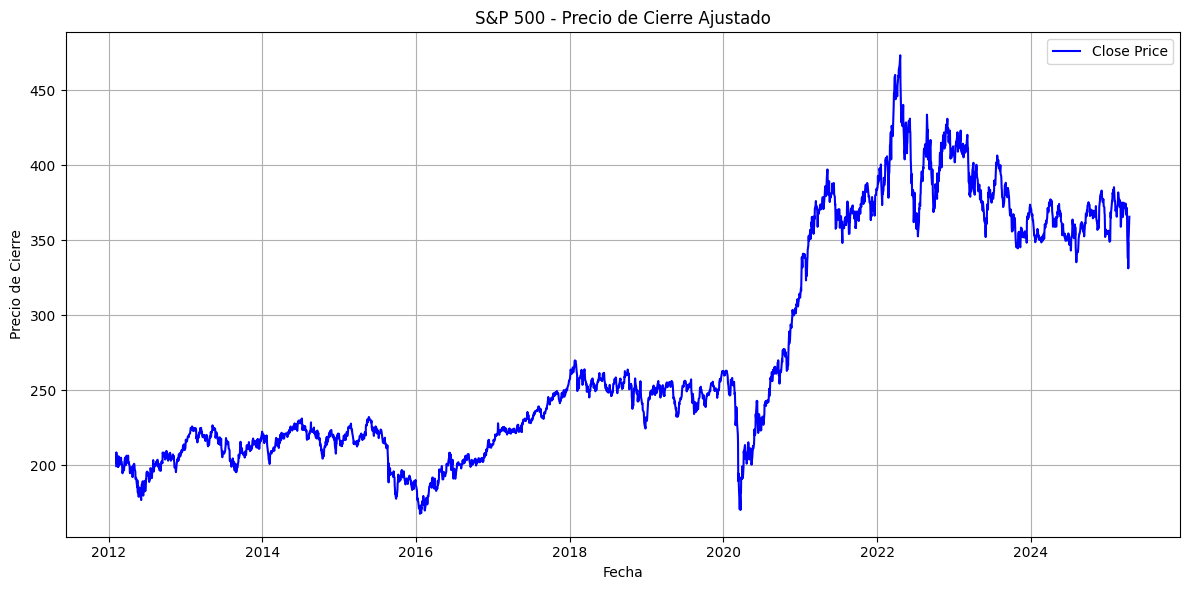

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Cargar el archivo CSV
df_VEGI = pd.read_csv('VEGI_historico.csv')

# Eliminar las tres últimas columnas del DataFrame
df_VEGI = df_VEGI.iloc[:, :-3]


# Renombrar las columnas
df_VEGI.columns = ['Date', 'Close', 'High', 'Low', 'Open', 'Volume']

# Eliminar las filas 0 y 1
df_VEGI = df_VEGI.drop([0, 1]).reset_index(drop=True)

# Convertir la columna 'Date' al formato datetime
df_VEGI['Date'] = pd.to_datetime(df_VEGI['Date'])


# Función para dividir valores mayores a 800 entre 10
def adjust_values(value):
    if value > 650:
        value /= 10
    return value

# Función para limpiar y escalar los valores numéricos
def clean_and_scale(value):
    # Eliminar separadores de miles (puntos y comas)
    value = str(value).replace('.', '').replace(',', '')
    # Convertir a float
    value = float(value)
    # Escalar el valor para que tenga solo tres números enteros
    while value >= 1000:  # Ajustar la escala si el número tiene más de tres dígitos enteros
        value /= 10
    return round(value, 2)  # Redondear a 2 decimales

# Aplicar la función a las columnas numéricas
for col in ['Close', 'High', 'Low', 'Open']:
    df_VEGI[col] = df_VEGI[col].apply(clean_and_scale)

    # Aplicar la función a las columnas numéricas después de limpiar los datos
for col in ['Close', 'High', 'Low', 'Open']:
    df_VEGI[col] = df_VEGI[col].apply(adjust_values)

# Mostrar el DataFrame resultante
print(df_VEGI)

# Guardar el DataFrame df_IPC en un archivo CSV
#df_VEGI.to_csv("df_VEGI.csv", sep=';', decimal='.', index=False, encoding='utf-8')

df_VEGI.to_csv("df_VEGI.csv", sep=';', decimal=',', index=False, encoding='utf-8')

# Confirmación
print("El DataFrame df_VEGI se ha guardado como 'df_VEGI.csv'.")

# Graficar el precio de cierre (Close) a lo largo del tiempo
plt.figure(figsize=(12, 6))
plt.plot(df_VEGI['Date'], df_VEGI['Close'], label='Close Price', color='blue')
plt.title('S&P 500 - Precio de Cierre Ajustado')
plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Cargar el archivo CSV
df_VEGI = pd.read_csv('VEGI_historico.csv')

print(df_VEGI.head())

                        Date       Open       High        Low      Close  \
0  2012-02-02 00:00:00-05:00  19.928591  19.936393  19.897379  19.897379   
1  2012-02-03 00:00:00-05:00  20.147073  20.147073  20.115862  20.115862   
2  2012-02-06 00:00:00-05:00  19.944191  20.061234  19.944191  19.975403   
3  2012-02-07 00:00:00-05:00  20.857128  20.857128  19.912979  20.084642   
4  2012-02-08 00:00:00-05:00  20.139261  20.498194  20.139261  20.186079   

   Volume  Dividends  Stock Splits  Capital Gains  
0     700        0.0           0.0            0.0  
1    3400        0.0           0.0            0.0  
2    2300        0.0           0.0            0.0  
3    1600        0.0           0.0            0.0  
4   15300        0.0           0.0            0.0  
